In [1]:
import sys
sys.path.append("../utils/")

In [2]:
from backend_manager import BackendManager
from runner import Runner
from data_collector import DataCollector
from filter_on_kpis import FilterOnKPIs
from runner_competing import RunnerCompeting
from case_duration_manager import CaseDurationsManager
from rank_variants import RankVariants
from measurements_visualizer import MeasurementsVisualizer
from measure_and_rank import measure_and_rank

In [3]:
import os
import time
import shutil

#### 01. Backend -NA

In [60]:
submit_cmd = "sbatch submit.sh"
#bm = BackendManager("login18-1.hpc.itc.rwth-aachen.de", "as641651", submit_cmd)
bm = BackendManager("login18-1.hpc.itc.rwth-aachen.de", "as641651")
bm.connect()
#bm = None

#### 02. Runner

In [120]:
args = ["331","279","338","854","497"]

exp_dir = "../Matrix-Chain-4/variants-linnea/"
if bm:
    exp_dir = "~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea"
threads = 10
runner = Runner("MC", exp_dir, args, threads=threads, backend=bm)

#### 03. Job name - NA

In [121]:
if bm:
    args_dir_name = runner.args_dir.split('/')[-1]
    job_name = "{}_T{}".format(args_dir_name, threads)
    job_name

#### 04. DataCollector

In [122]:
if bm:
    exp_dir_local = "../Matrix-Chain-4/variants-linnea/"
    local_data_dir = os.path.join(exp_dir_local, "cluster-experiments", "{}".format(args_dir_name))
    if os.path.exists(local_data_dir):
        shutil.rmtree(local_data_dir)
    os.makedirs(local_data_dir)
    dc = DataCollector(local_data_dir, runner.args_dir, bm)
else:
    dc = DataCollector(runner.args_dir)

#### 05. Look for already available data

In [123]:
case_table = dc.get_case_table()
case_table

scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea/experiments/331_279_338_854_497/case_table.csv ../Matrix-Chain-4/variants-linnea/cluster-experiments/331_279_338_854_497
b''


,case:concept:name,case:flops,case:num_kernels
0,algorithm0,443000000.0,3
1,algorithm2,460000000.0,3
2,algorithm4,564000000.0,3
3,algorithm1,443000000.0,3
4,algorithm5,586000000.0,3
5,algorithm3,490000000.0,3


In [124]:
cm = CaseDurationsManager()
cm.collect_case_durations(dc)

scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea/experiments/331_279_338_854_497/mean_ranks.csv ../Matrix-Chain-4/variants-linnea/cluster-experiments/331_279_338_854_497
b''
scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea/experiments/331_279_338_854_497/run_times_competing_0.csv ../Matrix-Chain-4/variants-linnea/cluster-experiments/331_279_338_854_497
b''
scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea/experiments/331_279_338_854_497/run_times_competing_1.csv ../Matrix-Chain-4/variants-linnea/cluster-experiments/331_279_338_854_497
b''
scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea/experiments/331_279_338_854_497/run_times_competing_2.csv ../Matrix-Chain-4/variants-linnea/cluster-experiments/331_279_338_854_497
b''

In [98]:
#cm.case_durations.head()

#### 05. Generate Experiments

In [99]:
ret = runner.generate_experiments()
ret

source ~/.analyzer; cd ~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea; python generate-variants-linnea.py 331 279 338 854 500 --threads=10;
['New solution:.............4.45e+08\n', 'No further generation steps possible.\n', '----------------------------------\n', 'Number of nodes:                 8\n', 'Solution nodes:                  1\n', 'Data:                     1.06e+06\n', 'Best solution:            4.45e+08\n', 'Intensity:                     420\n', 'Number of algorithms:            6\n', 'Generated Variants.\n']


0

#### 06. Single-run Experiment

In [100]:
ret = runner.run_experiments()
ret

source ~/.analyzer; cd ~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea/experiments/331_279_338_854_500; julia runner.jl;
Running experiments in the backend.


0

In [101]:
if bm:
    while bm.check_slrum_status(job_name) != 0:
        print("Waiting for Job to complete.")
        time.sleep(5)

['             JOBID PARTITION                           NAME     USER    STATE       TIME TIME_LIMI  NODES NODELIST(REASON)\n']


In [102]:
case_table = dc.get_case_table()
measurements = dc.get_all_runtimes_table()

scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea/experiments/331_279_338_854_500/case_table.csv ../Matrix-Chain-4/variants-linnea/cluster-experiments/331_279_338_854_500
b''
scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea/experiments/331_279_338_854_500/run_times.csv ../Matrix-Chain-4/variants-linnea/cluster-experiments/331_279_338_854_500
b''


In [103]:
case_table

,case:concept:name,case:flops,case:num_kernels
0,algorithm0,445000000.0,3
1,algorithm2,462000000.0,3
2,algorithm4,566000000.0,3
3,algorithm1,445000000.0,3
4,algorithm5,587000000.0,3
5,algorithm3,493000000.0,3


In [104]:
measurements.head()

,case:concept:name,concept:name,concept:flops,concept:operation,concept:kernel,timestamp:start,timestamp:end
0,algorithm0,gemm_2.89e+08,289000000.0,tmp3 = (C D),"gemm!('N', 'N', 1.0, ml2, ml3, 0.0, ml4)",1.656953e+09,1.656953e+09
1,algorithm0,gemm_6.24e+07,62400000.0,tmp1 = (A B),"gemm!('N', 'N', 1.0, ml0, ml1, 0.0, ml5)",1.656953e+09,1.656953e+09
2,algorithm0,gemm_9.43e+07,94300000.0,tmp6 = (tmp1 tmp3),"gemm!('N', 'N', 1.0, ml5, ml4, 0.0, ml6)",1.656953e+09,1.656953e+09
3,algorithm2,gemm_6.24e+07,62400000.0,tmp1 = (A B),"gemm!('N', 'N', 1.0, ml0, ml1, 0.0, ml4)",1.656953e+09,1.656953e+09
4,algorithm2,gemm_1.61e+08,161000000.0,tmp4 = (tmp1 C),"gemm!('N', 'N', 1.0, ml4, ml2, 0.0, ml5)",1.656953e+09,1.656953e+09


#### 07. KPI filter

In [125]:
kpi_filter = FilterOnKPIs(case_table, measurements)
kpi_filter.case_table

,case:concept:name,case:timestamp:start,case:timestamp:end,case:duration,case:flops,case:num_kernels,case:rel-flops,case:rel-duration
0,algorithm0,1.656953e+09,1.656953e+09,0.004374,443000000.0,3,0.000000,1.460239
1,algorithm2,1.656953e+09,1.656953e+09,0.003298,460000000.0,3,0.038375,0.855036
2,algorithm4,1.656953e+09,1.656953e+09,0.003303,564000000.0,3,0.273138,0.857852
3,algorithm1,1.656953e+09,1.656953e+09,0.003575,443000000.0,3,0.000000,1.010862
4,algorithm5,1.656953e+09,1.656953e+09,0.004098,586000000.0,3,0.322799,1.304948
5,algorithm3,1.656953e+09,1.656953e+09,0.001778,490000000.0,3,0.106095,0.000000


In [126]:
competing_cases = kpi_filter.filter_on_flops_and_rel_duration(2.4)
competing_cases

,case:concept:name,case:timestamp:start,case:timestamp:end,case:duration,case:flops,case:num_kernels,case:rel-flops,case:rel-duration
0,algorithm0,1.656953e+09,1.656953e+09,0.004374,443000000.0,3,0.000000,1.460239
1,algorithm2,1.656953e+09,1.656953e+09,0.003298,460000000.0,3,0.038375,0.855036
2,algorithm4,1.656953e+09,1.656953e+09,0.003303,564000000.0,3,0.273138,0.857852
3,algorithm1,1.656953e+09,1.656953e+09,0.003575,443000000.0,3,0.000000,1.010862
4,algorithm5,1.656953e+09,1.656953e+09,0.004098,586000000.0,3,0.322799,1.304948
5,algorithm3,1.656953e+09,1.656953e+09,0.001778,490000000.0,3,0.106095,0.000000


In [127]:
alg_seq_h0 = kpi_filter.get_alg_seq_sorted_on_duration(competing_cases)
alg_seq_h0

['algorithm3',
 'algorithm2',
 'algorithm4',
 'algorithm1',
 'algorithm5',
 'algorithm0']

#### 08. Runner Competing and compute ranks

In [108]:
runner_competing = RunnerCompeting(alg_seq_h0, runner.args_dir,
                                          threads=threads, backend=bm)

In [109]:
# Clear previous measurements if available before re-running
dc.delete_competing_measurements()
dc.delete_ranks()

rep_steps = 3
eps=0.001
ret = runner_competing.compute_ranks(rep_steps=rep_steps, eps=eps)
ret

rm -rf ~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea/experiments/331_279_338_854_500/*_competing_*
Error:  1
rm -rf ~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea/experiments/331_279_338_854_500/*ranks.csv
Error:  1
source ~/.analyzer; cd ~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea/experiments/331_279_338_854_500; python compute-ranks.py --rep_steps 3 --eps 0.001 --threads 10 --algs algorithm3 algorithm2 algorithm4 algorithm1 algorithm5 algorithm0
Submitted experiment to backend.


0

In [110]:
if bm:
    while bm.check_slrum_status(job_name) != 0:
        print("Waiting for Job to complete.")
        time.sleep(5)

['             JOBID PARTITION                           NAME     USER    STATE       TIME TIME_LIMI  NODES NODELIST(REASON)\n']


#### 09. View Ranks

In [128]:
ranks = dc.get_ranks()
ranks

scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/performance-analyazer/Experiment2/Matrix-Chain-4/variants-linnea/experiments/331_279_338_854_497/ranks.csv ../Matrix-Chain-4/variants-linnea/cluster-experiments/331_279_338_854_497
b''


,case:concept:name,case:rank:q95-q5,case:rank:q90-q10,case:rank:q85-q15,case:rank:q80-q20,case:rank:q75-q25,case:rank:q70-q30,case:rank:q65-q35
0,algorithm2,0,0,0,0,0,0,0
1,algorithm4,0,0,0,0,0,0,0
2,algorithm3,0,0,0,0,0,0,0
3,algorithm1,0,0,0,0,0,0,0
4,algorithm0,0,0,0,0,0,0,0
5,algorithm5,0,0,0,0,0,0,0


In [129]:
mean_ranks = dc.get_mean_ranks()
mean_ranks

,case:concept:name,case:mean-rank,case:mean-rank.1,case:mean-rank.2,case:mean-rank.3,case:mean-rank.4,case:mean-rank.5,case:mean-rank.6,case:mean-rank.7
0,algorithm3,0,0.714286,0.571429,0.142857,0.142857,0.285714,0.0,0.0
1,algorithm4,1,0.000000,0.000000,0.000000,0.142857,0.142857,0.0,0.0
2,algorithm1,2,0.714286,0.857143,0.142857,0.142857,0.285714,0.0,0.0
3,algorithm2,3,0.714286,0.428571,0.000000,0.000000,0.000000,0.0,0.0
4,algorithm0,4,0.714286,0.857143,0.142857,0.142857,0.285714,0.0,0.0
5,algorithm5,5,0.714286,0.857143,0.142857,0.142857,0.285714,0.0,0.0


#### 10. Get Measurements

In [130]:
num_runs = mean_ranks.shape[1]-2
num_measurements = num_runs*rep_steps
print("Number of measurements per alg: ", num_measurements)

Number of measurements per alg:  21


In [131]:
cm.collect_case_durations(dc)

Collected data from 7 runs


In [132]:
alg_measurements = cm.get_alg_measurements()

#### 11. Visualize Measurements

In [133]:
#mv = MeasurementsVisualizer(alg_measurements, alg_seq_h0)
mv = MeasurementsVisualizer(alg_measurements, list(ranks['case:concept:name']))

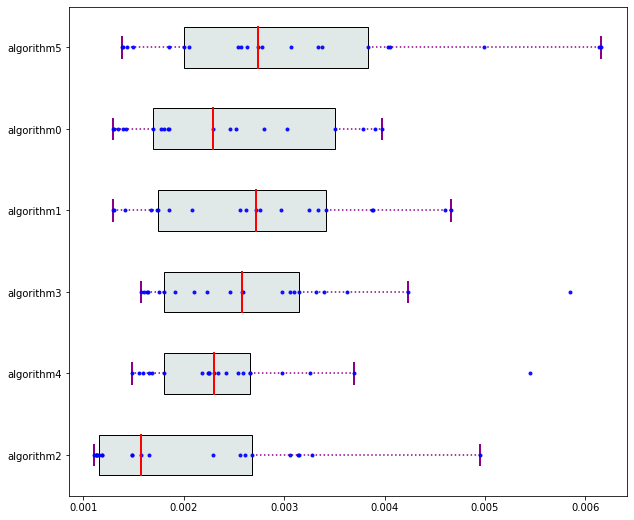

In [134]:
mv.show_measurements_boxplots(outliers=False)

In [135]:
print("Initial Sequence: ", alg_seq_h0)
ranks.merge(mean_ranks.iloc[:,[0,-1]], on='case:concept:name')

Initial Sequence:  ['algorithm3', 'algorithm2', 'algorithm4', 'algorithm1', 'algorithm5', 'algorithm0']


,case:concept:name,case:rank:q95-q5,case:rank:q90-q10,case:rank:q85-q15,case:rank:q80-q20,case:rank:q75-q25,case:rank:q70-q30,case:rank:q65-q35,case:mean-rank.7
0,algorithm2,0,0,0,0,0,0,0,0.0
1,algorithm4,0,0,0,0,0,0,0,0.0
2,algorithm3,0,0,0,0,0,0,0,0.0
3,algorithm1,0,0,0,0,0,0,0,0.0
4,algorithm0,0,0,0,0,0,0,0,0.0
5,algorithm5,0,0,0,0,0,0,0,0.0


In [136]:
competing_cases

,case:concept:name,case:timestamp:start,case:timestamp:end,case:duration,case:flops,case:num_kernels,case:rel-flops,case:rel-duration
0,algorithm0,1.656953e+09,1.656953e+09,0.004374,443000000.0,3,0.000000,1.460239
1,algorithm2,1.656953e+09,1.656953e+09,0.003298,460000000.0,3,0.038375,0.855036
2,algorithm4,1.656953e+09,1.656953e+09,0.003303,564000000.0,3,0.273138,0.857852
3,algorithm1,1.656953e+09,1.656953e+09,0.003575,443000000.0,3,0.000000,1.010862
4,algorithm5,1.656953e+09,1.656953e+09,0.004098,586000000.0,3,0.322799,1.304948
5,algorithm3,1.656953e+09,1.656953e+09,0.001778,490000000.0,3,0.106095,0.000000
